In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

 Feature Descriptions

*  **person_age**:Applicant's age
*  **person_gender**:Applicant's gender
*  **person_education**:Applicant's highest level of education
*  **person_income**:Applicant's annual income in currency
*  **person_emp_exp**:Years of employment experience
*  **person_home_ownership**:Home ownership status (e.g., rent, own, mortgage)
*  **loan_amnt**:Amount of loan requested
*  **loan_intent**:Intended purpose of the loan (e.g., personal, education)
*  **loan_int_rate**:Interest rate applicable to the loan
*  **loan_percent_income**:Loan amount as a percentage of annual income
*  **cb_person_cred_hist_length**:Number of years of credit history
*  **credit_score**:Applicant's credit score
*  **previous_loan_defaults_on_file**:Indicator of previous loan defaults (Yes/No)
*  **loan_status**:Loan status outcome (1 = approved, 0 = rejected)

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (3)\loan_data.csv")

In [12]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [14]:
df.shape

(45000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [16]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [3]:
numerical_columns=df.select_dtypes(include=["number"]).columns
categorical_columns=df.select_dtypes(include=["object"]).columns
print(f"numerical_columns:{numerical_columns}, no.of columns:{len(numerical_columns)}")

print(f"categorical_columns:{categorical_columns}, no. of columns:{len(categorical_columns)}")

numerical_columns:Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object'), no.of columns:9
categorical_columns:Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object'), no. of columns:5


In [22]:
df[numerical_columns].skew()

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
loan_status                    1.336351
dtype: float64

In [23]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [27]:
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


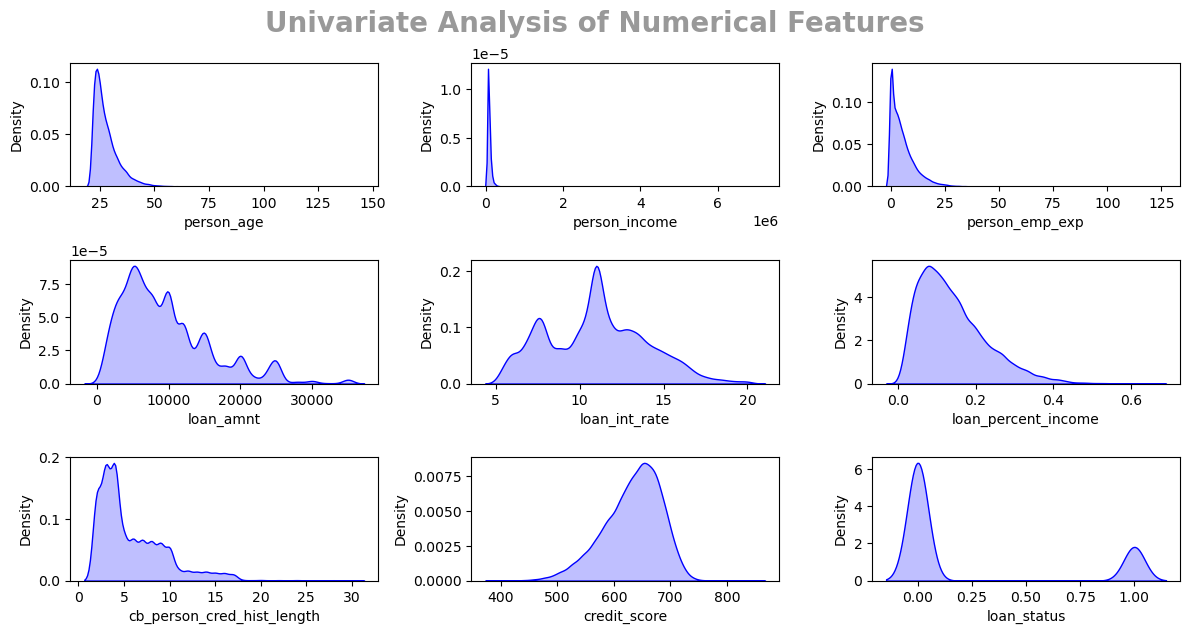

In [35]:
plt.figure(figsize=(12, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.4)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='b')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()
    
plt.savefig('Univariate_Num.png')

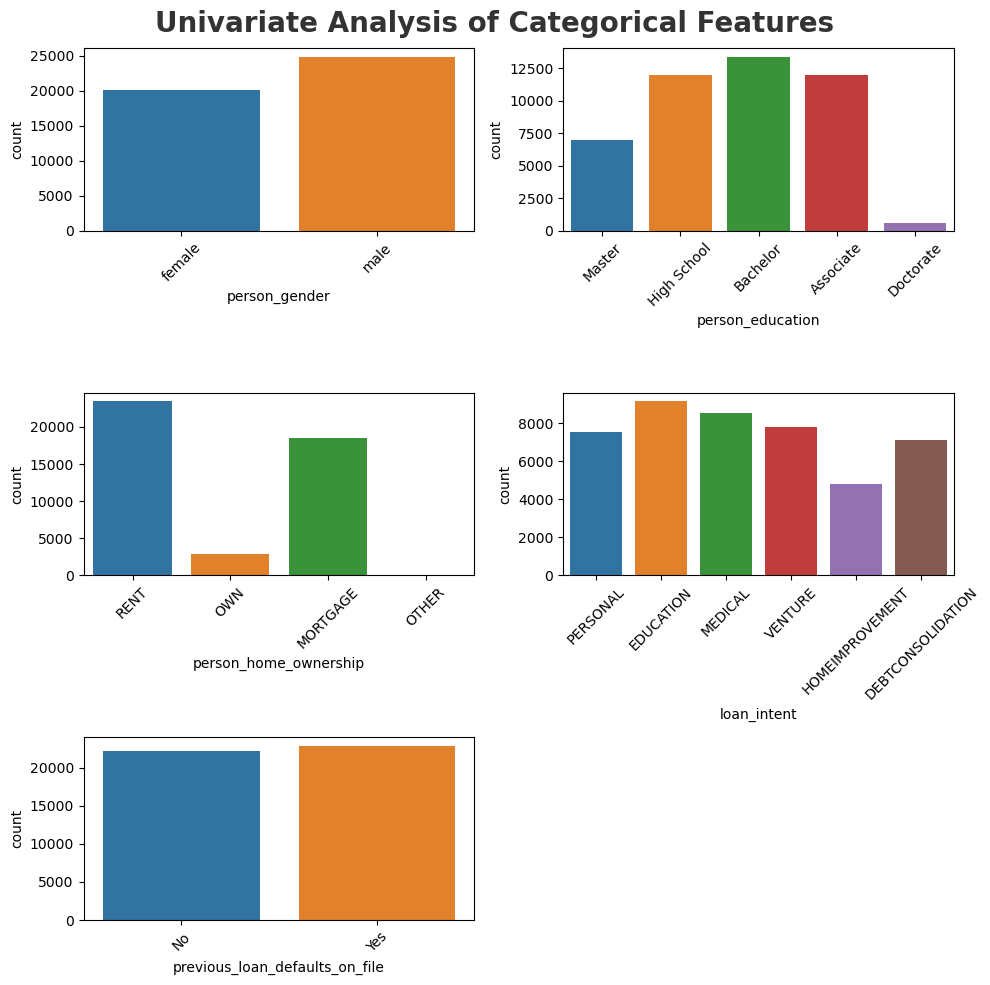

In [37]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8)
cat1 = ["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]
for i in range(0, len(cat1)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
plt.savefig('Univariate_Categorcal.png')

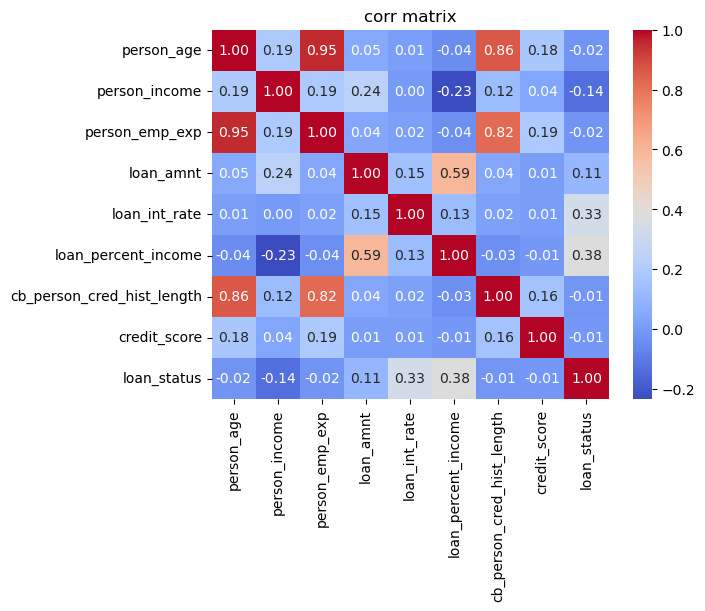

In [6]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("corr matrix")
plt.savefig("corr.png")

In [13]:
continues_features=[feature for feature in numerical_columns if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


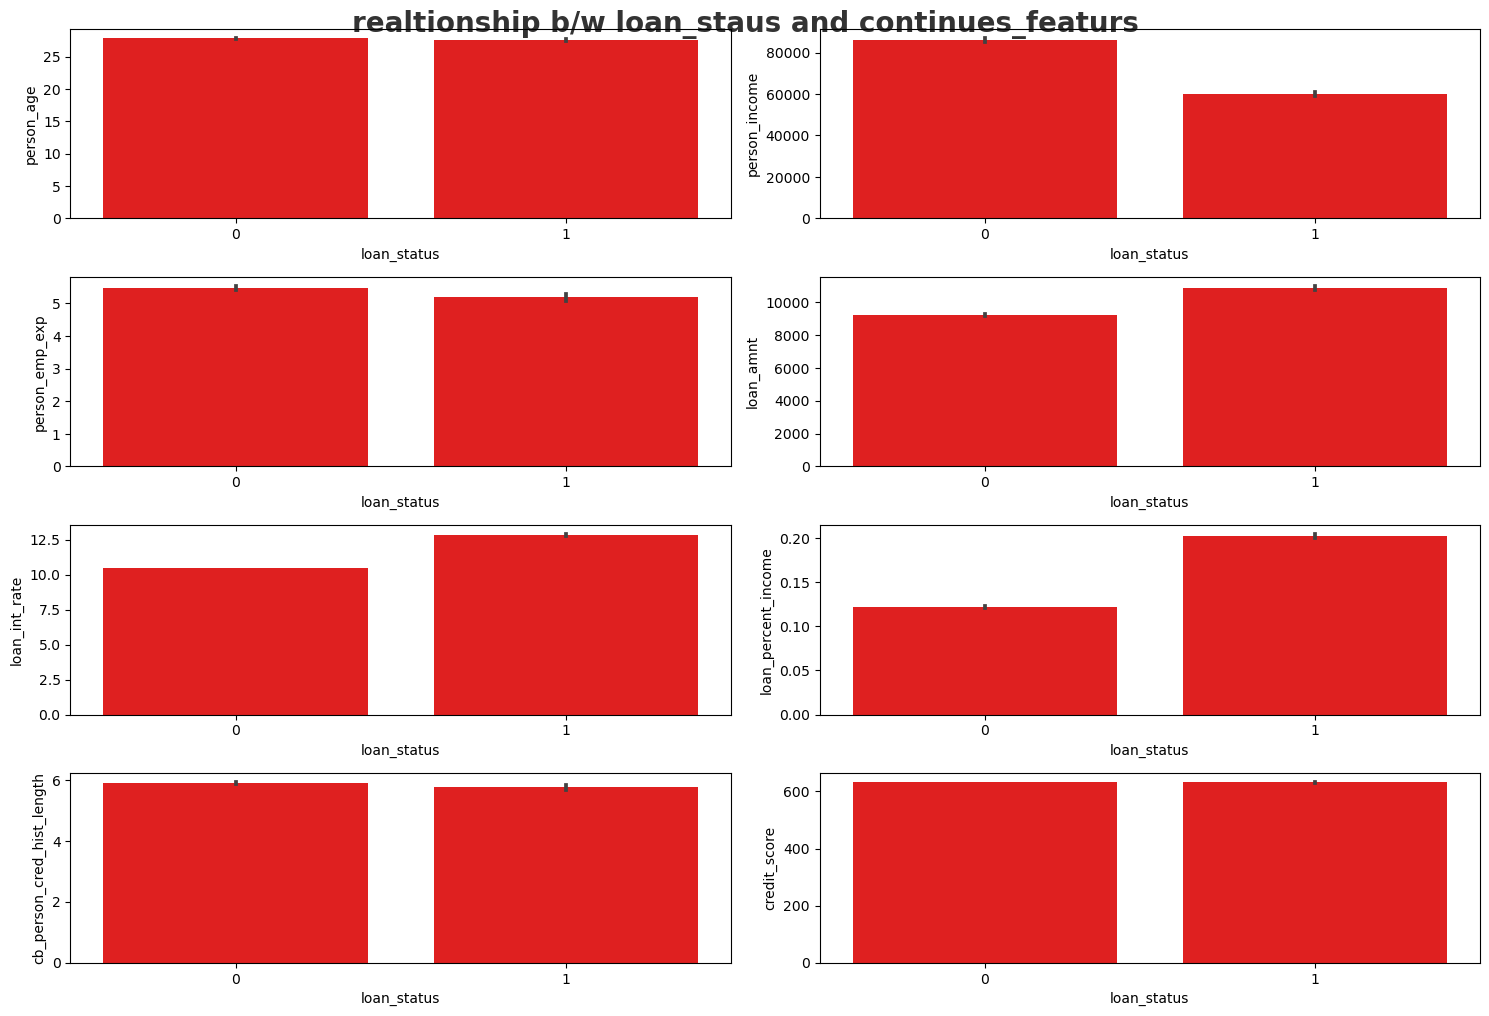

In [23]:
fig = plt.figure(figsize=(15,20))
for i in range(0,len(continues_features)):
    ax=plt.subplot(8,2,i+1)
    sns.barplot(data=df,x="loan_status", y=continues_features[i],color="r")
    plt.suptitle("realtionship b/w loan_staus and continues_featurs",fontsize=20, fontweight='bold', alpha=0.8)
    plt.tight_layout()
    plt.savefig("target_vs_continues.png")
                 
                 